In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def stim(cur_time, val, start, end):
    if start <= cur_time <= end:
        return val*np.sin((2*np.pi*cur_time)*1/(np.abs(end - start)))
    else:
        return 0

In [3]:
def two_cascade(t, y, rate_constants):
    s1, c1, e1, p1, c2, e2, s2, c3, p2, c4, e3 = y
    
    k1, k2, k11, k3, k33, k4, k5, k55, k6, k7, k77, k8, stim_val, stim_start, stim_end = rate_constants
    
    # Substrate 1
    ds1_dt = -k1*s1*e1 + k11*c1 + k4*c2 + stim(t, stim_val, stim_start, stim_end)*1/stim_val
    # Enzyme 1
    de1_dt = -k1*s1*e1 + (k11 + k2)*c1 
    # Complex 1
    dc1_dt = k1*s1*e1 - (k11+k2)*c1
    # Product 1
    dp1_dt = -k3*p1*e2 + k33*c2 - k5*s2*p1 + (k55 + k6)*c3 + k2*c1
    # Enzyme 2
    de2_dt = -k3*p1*e2 + (k33 + k4)*c2
    # Complex 2 
    dc2_dt = k3*p1*e2 - (k33 + k4)*c2
    
    # Substrate 2
    ds2_dt = -k5*s2*p1 + k55*c3 + k8*c4 # + stim(t, stim_val, stim_start, stim_end)
    # Complex 3
    dc3_dt = k5*s2*p1 - (k55 + k6)*c3    
    # Product 2
    dp2_dt = -k7*p2*e3 + k77*c4 + k6*c3
    # Enzyme 3
    de3_dt = -k7*p2*e3 + (k77 + k8)*c4 
    # Complex 4
    dc4_dt  = k7*p2*e3 - (k77 + k8)*c4
    
    return [ds1_dt, dc1_dt, de1_dt, dp1_dt, dc2_dt, de2_dt, ds2_dt, dc3_dt, dp2_dt, dc4_dt, de3_dt]
    # #            0       1       2       3      4       5       6        7      8       9      10
    # return [ds1_dt, de1_dt, dc1_dt, dp1_dt, de2_dt, dc2_dt, ds2_dt, dc3_dt, dp2_dt, de3_dt, dc4_dt]
       

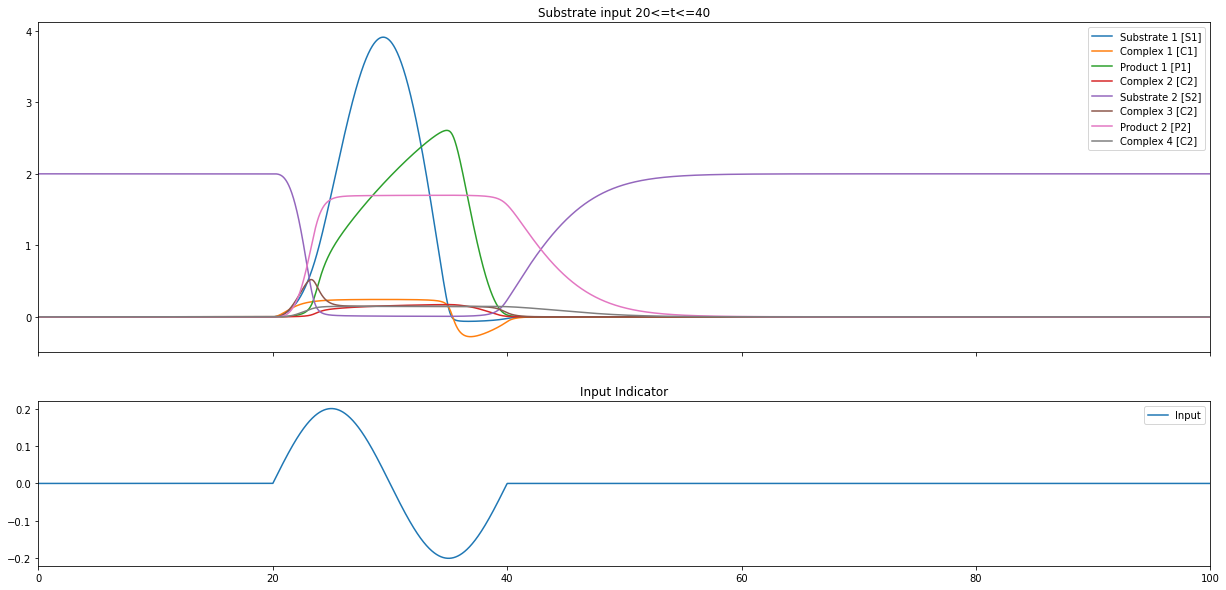

In [24]:
# T_MAX = 5
T_MAX = 100
T_SPAN = np.linspace(0, T_MAX, num = 5000)

# Initial Values
init_dict = {"S1": 0, 
             "C1": 0, 
             "E1": 0.25, 
             "P1": 0, 
             "C2": 0, 
             "E2": 0.25, 
             "S2": 2, 
             "C3": 0, 
             "P2": 0, 
             "C4": 0,
             "E3": 0.25}
initial_values = [v for v in init_dict.values()]

# Rate constants
rate_constant_dict = {"k1": 100, 
                      "k2": 2, 
                      "k11": 10, 
                      "k3": 10, 
                      "k33": 10,
                      "k4": 2,
                      "k5": 100,
                      "k55": 10,
                      "k6": 2,
                      "k7": 10, 
                      "k77": 10,
                      "k8": 2,
                      "stim_val": 0.2, 
                      "stim_start": 20 , 
                      "stim_end": 40}

rate_constants = [[i for i in rate_constant_dict.values()]]

solution = solve_ivp(
    fun=two_cascade,
    t_span=[0, T_MAX],
    y0=initial_values,
    args=rate_constants,
    rtol = 1e-11, 
    atol = 1e-13,
    method = 'BDF', 
    t_eval = T_SPAN
    # dense_output = True
)

stimulation_indicator = [stim(i, 
                              rate_constants[0][12], 
                              rate_constants[0][13], 
                              rate_constants[0][14]) for i in solution.t]



fig, ax = plt.subplots(
    2, 1, figsize=(21, 10), gridspec_kw={"height_ratios": [2, 1]}, sharex=True
)

ax[0].set_title(f"Substrate input {rate_constants[0][13]}<=t<={rate_constants[0][14]}")# | {rate_constant_dict}")
ax[0].plot(solution.t, solution.y[0], label = "Substrate 1 [S1]")
ax[0].plot(solution.t, solution.y[1], label = "Complex 1 [C1]")
# ax[0].plot(solution.t, solution.y[2], label = "Enzyme 1 [E1]")
ax[0].plot(solution.t, solution.y[3], label="Product 1 [P1]")
ax[0].plot(solution.t, solution.y[4], label="Complex 2 [C2]")
# ax[0].plot(solution.t, solution.y[5], label="Enzyme 2 [E1]")
ax[0].plot(solution.t, solution.y[6], label="Substrate 2 [S2]")
ax[0].plot(solution.t, solution.y[7], label="Complex 3 [C2]")
ax[0].plot(solution.t, solution.y[8], label="Product 2 [P2]")
ax[0].plot(solution.t, solution.y[9], label="Complex 4 [C2]")
# ax[0].plot(solution.t, solution.y[10], label="Enzyme 3 [E3]")
ax[0].set_xlim(left = 0, right = max(solution.t))
# ax[0].set_xlim(left = 0, right = 40)
ax[0].legend()
ax[1].set_title("Input Indicator")
ax[1].plot(solution.t, stimulation_indicator, label="Input")
ax[1].legend()
plt.show()

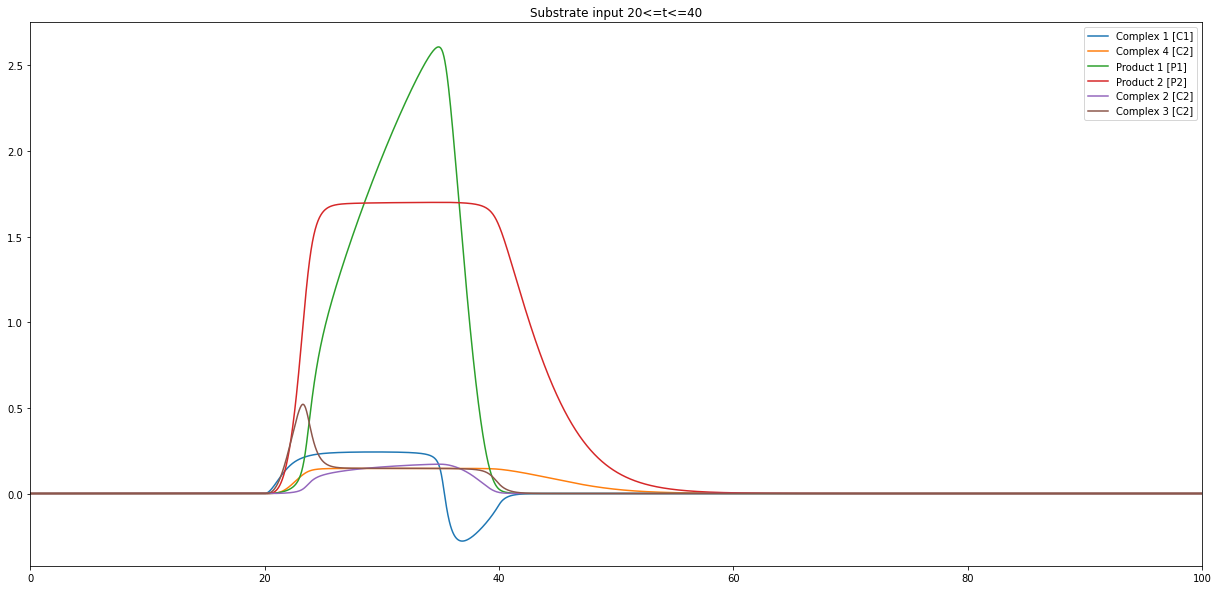

In [25]:

fig, ax = plt.subplots(
    1, 1, figsize=(21, 10), sharex=True
)

ax.set_title(f"Substrate input {rate_constants[0][13]}<=t<={rate_constants[0][14]}")# | {rate_constant_dict}")
ax.plot(solution.t, solution.y[1], label = "Complex 1 [C1]")
ax.plot(solution.t, solution.y[9], label="Complex 4 [C2]")
ax.plot(solution.t, solution.y[3], label="Product 1 [P1]")
ax.plot(solution.t, solution.y[8], label="Product 2 [P2]")
ax.plot(solution.t, solution.y[4], label="Complex 2 [C2]")
ax.plot(solution.t, solution.y[7], label="Complex 3 [C2]")
ax.set_xlim(left = 0, right = max(solution.t))
ax.legend()
# ax[1].set_title("Input Indicator")
# ax[1].plot(solution.t, stimulation_indicator, label="Input")
# ax[1].legend()
plt.show()

In [26]:
import pandas as pd

In [27]:
solution_dict = {'S1': solution.y[0], 
                 'C1':solution.y[1], 
                 'E1': solution.y[2], 
                 'P1': solution.y[3], 
                 'C2': solution.y[4], 
                 'E2': solution.y[5], 
                 'S2':solution.y[6], 
                 'C3':solution.y[7], 
                 'P2': solution.y[8], 
                 'C2':solution.y[9], 
                 'E3':solution.y[10]}

In [28]:
df = pd.DataFrame(solution_dict)

In [29]:
df.to_csv("train_data_2.csv")

In [22]:
df

,S1,C1,E1,P1,C2,E2,S2,C3,P2,E3
0,0.000000e+00,0.000000e+00,0.25,0.000000e+00,0.000000e+00,0.25,1.0,0.000000e+00,0.000000e+00,0.25
1,0.000000e+00,0.000000e+00,0.25,0.000000e+00,0.000000e+00,0.25,1.0,0.000000e+00,0.000000e+00,0.25
2,0.000000e+00,0.000000e+00,0.25,0.000000e+00,0.000000e+00,0.25,1.0,0.000000e+00,0.000000e+00,0.25
3,0.000000e+00,0.000000e+00,0.25,0.000000e+00,0.000000e+00,0.25,1.0,0.000000e+00,0.000000e+00,0.25
4,0.000000e+00,0.000000e+00,0.25,0.000000e+00,0.000000e+00,0.25,1.0,0.000000e+00,0.000000e+00,0.25
...,...,...,...,...,...,...,...,...,...,...
4995,-1.033526e-12,-2.153179e-12,0.25,-1.033526e-11,8.874701e-11,0.25,1.0,-8.612716e-11,4.012624e-10,0.25
4996,-1.033526e-12,-2.153179e-12,0.25,-1.033526e-11,8.751496e-11,0.25,1.0,-8.612716e-11,3.955228e-10,0.25
4997,-1.033526e-12,-2.153179e-12,0.25,-1.033526e-11,8.629159e-11,0.25,1.0,-8.612716e-11,3.898235e-10,0.25
4998,-1.033526e-12,-2.153179e-12,0.25,-1.033526e-11,8.507683e-11,0.25,1.0,-8.612716e-11,3.841645e-10,0.25
